### Import libraries and read data

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from numpy import argmax
from scipy import constants
import random

import os
import sys
import re
import pdb
import glob

#import suftware

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Lambda, Concatenate
from keras.optimizers import Adam, SGD
from keras import metrics
from keras import regularizers
from keras import callbacks
import keras.backend as K

import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.ops import math_ops

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
plt.ion()

Using TensorFlow backend.
/Users/tareen/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tareen/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tareen/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tareen/miniconda3/lib/python3.6/site-packag

In [2]:
input_data_ordered_raw = pd.read_csv('psi_9nt.csv')
#input_data_ordered_raw = pd.read_csv('ratios_9nt_ss_locus.txt',delim_whitespace=True)

In [3]:
input_data_ordered_raw.head()

,seq,brca2_9nt,brca2_9nt_stderr,ikbkap_9nt,ikbkap_9nt_stderr,smn1_9nt,smn1_9nt_stderr
0,AAAGCAAAA,0.373522,0.095217,0.080039,0.081333,0.227001,0.082164
1,AAAGCAAAC,0.688386,0.063575,0.061021,0.018316,0.522138,0.017503
2,AAAGCAAAG,0.756357,0.481555,0.045032,0.023374,0.210907,0.170688
3,AAAGCAAAU,0.443014,0.127961,0.071423,0.028762,0.232645,0.044371
4,AAAGCAACA,0.548363,0.140963,0.100128,0.071551,0.362139,0.127696


In [4]:
len(input_data_ordered_raw)

32768

## Remove nan rows from dataframe

In [5]:
input_data_ordered_raw = input_data_ordered_raw[['seq','brca2_9nt']].dropna()

# so I don't have to use pseudocounts
input_data_ordered_raw = input_data_ordered_raw[input_data_ordered_raw['brca2_9nt']>0]

In [6]:
#sequences_9nt = input_data_ordered_raw['seq'].values
sequences = input_data_ordered_raw['seq'].values
val = np.log10(input_data_ordered_raw['brca2_9nt'].values)
#val = input_data_ordered_raw['smn1_9nt']

In [7]:
len(input_data_ordered_raw)

31197

In [8]:
# sequences = []
# # delete characters G and U at positions 3 and 4 in the sequences
# for _ in range(len(sequences_9nt)):
#     sequences.append(sequences_9nt[_][0:3]+sequences_9nt[_][5:])
    
# sequences = np.array(sequences)    

In [9]:
#val_norm = (val-min(val))/(max(val)-min(val))
val_norm = val

In [10]:
len(sequences)

31197

## Split the data into test and train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(sequences,val_norm,test_size=0.2,random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(sequences,val,test_size=0.2)



In [13]:
# min_y_train = min(y_train)
# max_y_train = max(y_train)

# min_y_test = min(y_test)
# max_y_test = max(y_test)

# y_train = (y_train-min(y_train))/(max(y_train)-min(y_train))
# y_test = (y_test-min(y_test))/(max(y_test)-min(y_test))

In [14]:
x_train[0]

'AUAGUAACA'

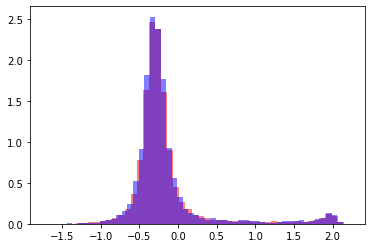

In [15]:
plt.hist(y_train,bins=50,color='r',density=True,alpha=0.5)
plt.hist(y_test,bins=50,color='b',density=True,alpha=0.5)
plt.show()

In [16]:
# le = LabelEncoder().fit(bases).transform(bases).reshape(len(bases), 1)
# onehot_encoder = OneHotEncoder(sparse = False)
# onehot_encoder.fit(le)

In [17]:
# # Fit a label encoder and a onehot encoder
# bases = ["A","C","G","U"]
# label_encoder = LabelEncoder()
# label_encoder.fit(bases)
# tmp = label_encoder.transform(bases)
# tmp = tmp.reshape(len(tmp), 1)
# onehot_encoder = OneHotEncoder(sparse = False)
# onehot_encoder.fit(tmp)

# # Encode sequence into onehot
# def onehot_sequence(sequence, lab_encoder = label_encoder, one_encoder = onehot_encoder):
#     """Sequence as a string"""
#     tmp = lab_encoder.transform(list(sequence))
#     tmp = tmp.reshape(len(tmp),1)
#     tmp = one_encoder.transform(tmp)
#     return tmp

In [18]:
# Fit a label encoder and a onehot encoder
bases = ["A","C","G","U"]
label_encoder = LabelEncoder()
label_encoder.fit(bases)
tmp = label_encoder.transform(bases)
tmp = tmp.reshape(len(tmp), 1)
onehot_encoder = OneHotEncoder(sparse = False)
onehot_encoder.fit(tmp)

# Encode sequence into onehot
def onehot_sequence(sequence, lab_encoder = label_encoder, one_encoder = onehot_encoder):
    """Sequence as a string"""
    tmp = lab_encoder.transform(list(sequence))
    tmp = tmp.reshape(len(tmp),1)
    tmp = one_encoder.transform(tmp)
    return tmp

In [19]:
print(x_train[2])
onehot_sequence(x_train[2]).shape

UCUGCUUUU


(9, 4)

### Form input from sequences for all-pairs model

In [20]:
# nbr_dinucleotides = ['AA', 'AC', 'AG', 'AU', 
#                      'CA', 'CC', 'CG', 'CU', 
#                      'GA', 'GC', 'GG', 'GU',
#                      'UA', 'UC', 'UG', 'UU']


# # one-hot encode di-nucleotide training set
# dinuc_seqs_OHE = []
# for _ in range(len(X_train)):

#     # take current raw training sequence    
#     raw_sequence = X_train[_]
    
#     # split it into all nucleotide pairs
#     all_nucl_pairs = []

#     for i in range(len(raw_sequence)):
#         for j in range(i+1,len(raw_sequence)):
#             all_nucl_pairs.append(raw_sequence[i]+raw_sequence[j])
    
#     # get indices of where pairs occur so that these indices could be used to one-hot encode.
#     list_of_nbr_indices = [nbr_dinucleotides.index(dn) for dn in all_nucl_pairs]
    
#     # do One-hot encoding. Every time a pair from list 'nbr_dinucleotides'
#     # appears at a position, put 1 there, otherwise zeros.
#     tmp_seq = np.array(list_of_nbr_indices)
#     OHE_dinucl_seq = np.zeros((tmp_seq.size, len(nbr_dinucleotides)))
#     OHE_dinucl_seq[np.arange(tmp_seq.size),tmp_seq] = 1
    
#     dinuc_seqs_OHE.append(OHE_dinucl_seq)
    

# dinuc_seqs_OHE_test = []
# for _ in range(len(X_test)):

#     # take current raw test sequence    
#     raw_sequence = X_test[_]
    
#     # split it into all nucleotide pairs
#     all_nucl_pairs = []

#     for i in range(len(raw_sequence)):
#         for j in range(i+1,len(raw_sequence)):
#             all_nucl_pairs.append(raw_sequence[i]+raw_sequence[j])
    
#     # get indices of where pairs occur so that these indices could be used to one-hot encode.
#     list_of_nbr_indices = [nbr_dinucleotides.index(dn) for dn in all_nucl_pairs]
    
#     # do One-hot encoding. Every time a pair from list 'nbr_dinucleotides'
#     # appears at a position, put 1 there, otherwise zeros.
#     tmp_seq = np.array(list_of_nbr_indices)
#     OHE_dinucl_seq = np.zeros((tmp_seq.size, len(nbr_dinucleotides)))
#     OHE_dinucl_seq[np.arange(tmp_seq.size),tmp_seq] = 1
    
#     dinuc_seqs_OHE_test.append(OHE_dinucl_seq)    

In [21]:
import time
start_time = time.time()

input_seqs_ohe = []
for _ in range(len(x_train)):
    
    if _%5000==0:
        print(_)
    
    input_seqs_ohe.append(onehot_sequence(x_train[_]))


print("--- %s seconds ---" % (time.time() - start_time))
    
    
test_seqs_ohe = []    
for _ in range(len(x_test)):
    test_seqs_ohe.append(onehot_sequence(x_test[_]))

0
5000
10000
15000
20000
--- 11.040867805480957 seconds ---


In [22]:
np.shape(input_seqs_ohe)

(24957, 9, 4)

In [23]:
type(input_seqs_ohe[0])

numpy.ndarray

In [24]:
type(input_seqs_ohe)

list

In [25]:
input_sequences_tensor2 = np.array(input_seqs_ohe)
test_input_sequences_tensor2 = np.array(test_seqs_ohe)

In [26]:
print(input_sequences_tensor2.shape)
print(test_input_sequences_tensor2.shape)

(24957, 9, 4)
(6240, 9, 4)


In [27]:
labels = np.array(y_train)
test_labels = np.array(y_test)

In [28]:
y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_train.shape

(24957, 1)

In [29]:
x_train_tensor = input_seqs_ohe.copy()
x_test_tensor = test_seqs_ohe.copy()

In [30]:
input_sequences_tensor2 = []
test_input_sequences_tensor2 = []

for _ in range(len(x_train_tensor)):
    
    if _%5000==0:
        print(_)
    
    temp = x_train_tensor[_].ravel()
    input_sequences_tensor2.append(temp)
    
for _ in range(len(x_test_tensor)):
    
    temp = x_test_tensor[_].ravel()
    test_input_sequences_tensor2.append(temp)
    
input_sequences_tensor2 = np.array(input_sequences_tensor2)
test_input_sequences_tensor2 = np.array(test_input_sequences_tensor2)    

0
5000
10000
15000
20000


In [31]:
input_sequences_tensor2.shape, labels.shape

((24957, 36), (24957,))

## Custom error metric

In [32]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [33]:
# import keras.backend as K
# import numpy as np


# def gaussian_nll(ytrue, ypreds):
    
#     """
#     TF implmementation of multivariate Gaussian negative loglikelihood loss function. 
#     This implementation implies diagonal covariance matrix.
    
#     Parameters
#     ----------
#     ytrue: tf.tensor of shape [n_samples, n_dims]
#         ground truth values
#     ypreds: tf.tensor of shape [n_samples, n_dims*2]
#         predicted mu and logsigma values (e.g. by your neural network)
        
#     Returns
#     -------
#     neg_log_likelihood: float
#         negative loglikelihood

    
#     """
    
#     # number of outputs
#     #n_dims = int(int(ypreds.shape[1])/2)
    
#     # output 1 coming out of observable node respenting mu
#     mu = ypreds

#     logsigma = model.layers[4].sigma
#     print(logsigma)
    
#     #squared_error_term = 0.5*K.sum(K.square((ytrue-mu)/K.exp(logsigma)),axis=1)
#     negative_log_likelihood = 0.5*K.sum(K.square((ytrue-mu)/K.exp(logsigma))+logsigma,axis=1)
    
#     #negative_log_likelihood = squared_error_term+logsigma
#     #negative_log_likelihood = squared_error_term

#     #return K.sum(negative_log_likelihood)
#     return negative_log_likelihood

## Custom Loss

In [34]:
import keras.backend as K
import tensorflow as tf

#K.clear_session()

In [35]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout 
from keras import regularizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import maxnorm, nonneg

from mavenn.src.utils import get_example_dataset
from sklearn.model_selection import train_test_split
from mavenn.src.utils import _generate_nbr_features_from_sequences
from mavenn.src.utils import _generate_all_pair_features_from_sequences
from mavenn.src.utils import onehot_encode_array

X, y = get_example_dataset('MPSA')
x_train, x_test, y_train, y_test = train_test_split(X, y)

x_train_nbr_OHE = _generate_all_pair_features_from_sequences(x_train,'rna')
x_test_nbr_OHE = _generate_all_pair_features_from_sequences(x_test,'rna')

# x_train_nbr_OHE = onehot_encode_array(x_train,['A','C','G','U'])
# x_test_nbr_OHE = onehot_encode_array(x_test,['A','C','G','U'])

In [36]:
class CustomDense(Dense):
    
    def __init__(self, units=1,**kwargs):
    
        self.units = units
        super(CustomDense,self).__init__(units,**kwargs)  

    def build(self, input_shape):
        
        self.logsigma = self.add_weight(name='logsigma',
            shape=(1, 1),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, inputs):
        
        # compute per-datum ll here
        
        # this is yhat
        yhat = inputs[:,0:1]
        
        # these are the labels
        ytrue = inputs[:,1:]
        
        # Gaussian likelihood
        #ll =0.5*K.sum(K.square((ytrue-yhat)/K.exp(self.logsigma))+self.logsigma,axis=1)
        
        # Cauchy likelihood
        ll = K.sum(K.log(K.square((ytrue-yhat))+K.square(K.exp(self.logsigma)))-self.logsigma,axis=1)
        return ll

    
            

In [37]:
def custom_loss(y_true, y_pred):
    #return K.sum(y_pred)
    return y_pred
    

In [38]:
number_input_layer_nodes = len(x_train_nbr_OHE[0]) +1
inputTensor = Input((number_input_layer_nodes,),name='Sequence')

sequence_input = Lambda(lambda x: x[:,0:len(x_train_nbr_OHE[0])], output_shape=((len(x_train_nbr_OHE[0]),)))(inputTensor)
labels_input = Lambda(lambda x: x[:,len(x_train_nbr_OHE[0]):len(x_train_nbr_OHE[0])+1], output_shape=((1,)), trainable=False)(inputTensor)                    

                    
phi = Dense(1)(sequence_input)
intermediateTensor = Dense(50,activation='sigmoid',kernel_constraint=nonneg())(phi)
yhat = Dense(1,kernel_constraint=nonneg())(intermediateTensor)
concatenateLayer = Concatenate()([yhat,labels_input])
outputTensor = CustomDense()(concatenateLayer)

#create the model:
model = Model(inputTensor,outputTensor)                    

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence (InputLayer)           (None, 577)          0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 576)          0           Sequence[0][0]                   
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            577         lambda_1[0][0]                   
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           100         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [40]:
model.layers

### Define model

In [41]:
# number_input_layer_nodes = len(x_train_nbr_OHE[0])
# inputTensor = Input((number_input_layer_nodes,),name='Sequence')
# phi = Dense(1)(inputTensor)
# intermediateTensor = Dense(50,activation='sigmoid',kernel_constraint=nonneg())(phi)
# yhat = Dense(1,kernel_constraint=nonneg())(intermediateTensor)

# outputTensor = CustomDense(ytrue = K.constant(y_train.reshape(-1,1)))(yhat)

# #create the model:
# model = Model(inputTensor,outputTensor)


In [42]:
model.layers[7].get_weights()

[array([[0.01564025]], dtype=float32)]

In [43]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence (InputLayer)           (None, 577)          0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 576)          0           Sequence[0][0]                   
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            577         lambda_1[0][0]                   
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           100         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [44]:
#model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['mean_absolute_error'])
#model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.005), metrics=['mean_absolute_error'])
model.compile(loss=custom_loss,optimizer=Adam(lr=0.005))


In [45]:
train_sequences = []
test_sequences = []

for _ in range(len(x_train_nbr_OHE)):
    temp = x_train_nbr_OHE[_].ravel()
    temp = np.append(temp,y_train[_])
    train_sequences.append(temp)
    
for _ in range(len(x_test_nbr_OHE)):
    
    temp = x_test_nbr_OHE[_].ravel()
    temp = np.append(temp,y_test[_])
    test_sequences.append(temp)

In [46]:
train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [47]:
#history = model.fit(x_train_flat, y_train, validation_split=0.2, epochs=25)  # starts training
#history = model.fit(input_sequences_tensor2, labels, validation_split=0.2, epochs=25,verbose=1)  # starts training
history = model.fit(train_sequences, y_train, validation_split=0.2, epochs=100,verbose=1)  # starts training



Train on 18717 samples, validate on 4680 samples
Epoch 1/100
18717/18717 [==============================] - 1s 46us/step - loss: -0.5833 - val_loss: -1.1736
Epoch 2/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2021 - val_loss: -1.1590
Epoch 3/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2131 - val_loss: -1.2804
Epoch 4/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2382 - val_loss: -1.2743
Epoch 5/100
18717/18717 [==============================] - 1s 32us/step - loss: -1.2491 - val_loss: -1.2817
Epoch 6/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2557 - val_loss: -1.2595
Epoch 7/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2635 - val_loss: -1.2889
Epoch 8/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2652 - val_loss: -1.2174
Epoch 9/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2644

Epoch 76/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2906 - val_loss: -1.2918
Epoch 77/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2911 - val_loss: -1.2873
Epoch 78/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2903 - val_loss: -1.2930
Epoch 79/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2904 - val_loss: -1.3004
Epoch 80/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2896 - val_loss: -1.2993
Epoch 81/100
18717/18717 [==============================] - 1s 32us/step - loss: -1.2913 - val_loss: -1.2979
Epoch 82/100
18717/18717 [==============================] - 1s 33us/step - loss: -1.2910 - val_loss: -1.3051
Epoch 83/100
18717/18717 [==============================] - 1s 31us/step - loss: -1.2933 - val_loss: -1.2983
Epoch 84/100
18717/18717 [==============================] - 1s 32us/step - loss: -1.2928 - val_loss: -1.3022
Epoch 85/100
18717/

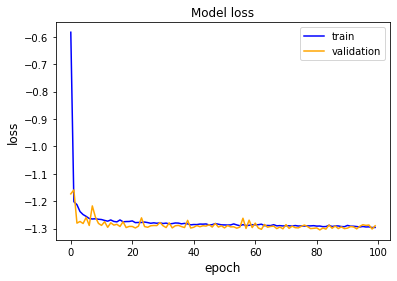

In [48]:
plt.figure()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [49]:
model.layers[3].output
#model.layers[1].output

<tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 50) dtype=float32>

In [50]:
# Note this gives liklelihood
model_prediction = model.predict(test_sequences)
model_prediction_train = model.predict(train_sequences)

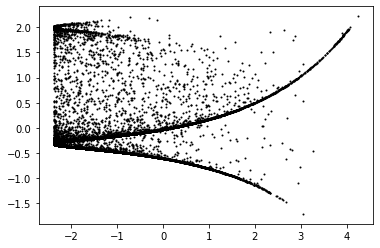

In [51]:
plt.scatter(model_prediction_train.ravel(),y_train,color='black',s=1)
#plt.scatter(model_prediction[:,0],y_test,color='blue',s=1)

plt.show()

In [52]:
np.exp(model.layers[7].get_weights()[0][0][0])

0.09228574

In [53]:
get_yhat_out = K.function([model.layers[1].input],[model.layers[4].output])
yhat = get_yhat_out([x_test_nbr_OHE])

In [54]:
model.layers
get_1st_layer_output = K.function([model.layers[1].input],[model.layers[2].output])
layer_output = get_1st_layer_output([x_test_nbr_OHE])
get_1st_layer_output_train = K.function([model.layers[0].input],[model.layers[1].output])
layer_output_train = get_1st_layer_output_train([x_train_nbr_OHE])

In [55]:
sigma = np.exp(model.layers[7].get_weights()[0][0][0])

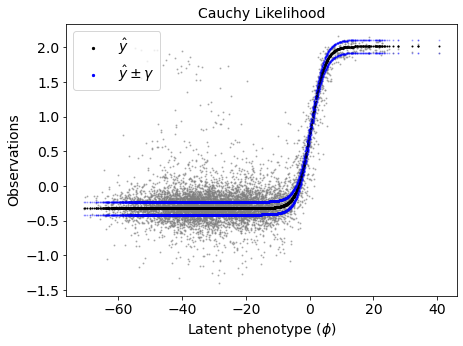

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(layer_output[0],y_test,s=1,color='gray',alpha=0.5,label='')
plt.scatter(layer_output[0],yhat[0].ravel(),color='black',s=1,label='$\hat{y}$')
plt.scatter(layer_output[0],yhat[0].ravel()+sigma,color='blue',s=1,alpha=0.25,label='$\hat{y} \pm \gamma$')
plt.scatter(layer_output[0],yhat[0].ravel()-sigma,color='blue',s=1,alpha=0.25)
plt.tick_params(labelsize=14)

leg = plt.legend(fontsize=14,loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([5.0])
      

plt.ylabel('Observations',fontsize=14)
plt.xlabel('Latent phenotype ($\phi$)',fontsize=14)
plt.title('Cauchy Likelihood',fontsize=14)
plt.show()

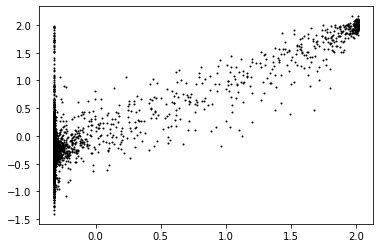

In [57]:
plt.scatter(yhat[0].ravel(),y_test,s=1,color='black')

In [58]:
np.corrcoef(yhat[0].ravel(),y_test)[0][1]**2

0.7458627579652578